<a href="https://colab.research.google.com/github/qwertynerd97/ml2020/blob/master/Homework2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem 1
Import all necessary Libraries

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

Plot of $x^2 + y^2 = z$, with a minima at (0,0,0)

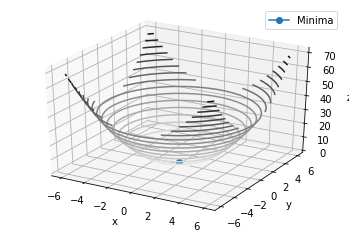

In [11]:
def f(x, y):
    return (x** 2 + y** 2)

x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 20, cmap='binary')
ax.plot([0],[0],marker='o',label='Minima')
ax.legend()
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

Plot of $-(x^2 + y^2) = z$, with a maxima at (0,0,0)

Text(0.5, 0, 'z')

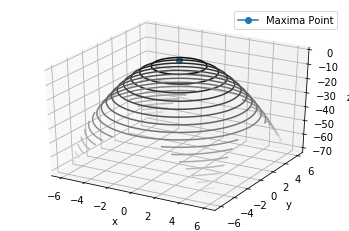

In [13]:
def f(x, y):
    return -(x** 2 + y** 2)

x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 20, cmap='binary')
ax.plot([0],[0],marker='o',label='Maxima Point')
ax.legend()
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

Plot of $x^2 - y^2 = z$, with a saddle point at (0,0,0)

Text(0.5, 0, 'z')

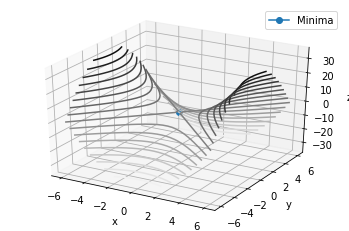

In [12]:
def f(x, y):
    return (x** 2 - y** 2)

x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 20, cmap='binary')
ax.plot([0],[0],marker='o',label='Saddle/Inflection Point')
ax.legend()
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

# Problem 2
Import all necessary libraries

In [0]:
import numpy as np
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

Generate the random data for x1, x2, and y

In [0]:
# generate m random pairs (x, y)

m = 100
x1 = 2 * np.random.rand(m, 1)
x2 = 3 * np.random.rand(m, 1)
y = 4 + 5*x1 + 7*x2 + np.random.rand(m, 1)

Plot out the randomly generated data

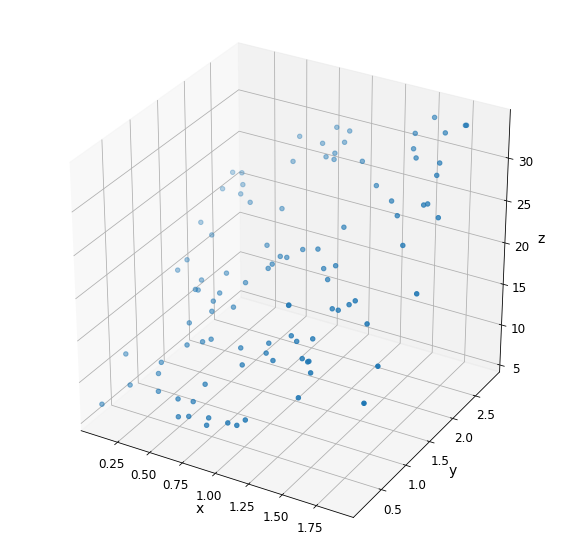

In [16]:
plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
ax.margins(0)
ax.scatter3D(x1, x2, y)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

plt.show()

Organize the data into a matrix

In [0]:
xMatrix = np.column_stack([np.ones((m, 1)), x1, x2])

Set up the defaults for the regression training

In [25]:
# number of epochs
epochs = 20
# learning rate
lr = 0.01
# fix initial random weight for gradient descent (batch gradient descent)
np.random.seed(42)
initial_weights = np.random.randn(3, 1)

array([[ 0.49671415],
       [-0.1382643 ],
       [ 0.64768854]])

Train the model

In [0]:
weights = initial_weights
weight_path = []
batch_size = 4

weight_path.append(weights)
for epoch in range(epochs):
    shuffled_indices = np.random.permutation(m)
    xMatrix_shuffled = xMatrix[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, batch_size):
        xi = xMatrix_shuffled[i:i+batch_size]
        yi = y_shuffled[i:i+batch_size]
        gradient = 1 / batch_size * xi.T.dot(xi.dot(weights) - yi)
        #grad2 = 1 / batch_size * xi.T.dot(xi.dot(weight) - yi)
        #gradb = 1 / batch_size * xi.T.dot(xi.dot(weight) - yi)
        weights = weights - lr * gradient
        #w2 = w2 - lr * grad2
        #b = b - lr * gradb
        weight_path.append(weights)

The predictions of the model

No handles with labels found to put in legend.


Text(0.5, 0, 'z')

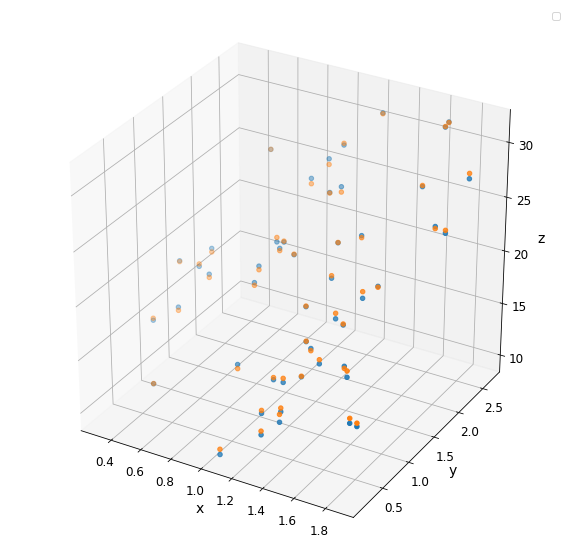

In [38]:
test_quantity = 50
test_x1 = 2 * np.random.rand(test_quantity, 1)
test_x2 = 3 * np.random.rand(test_quantity, 1)
y_hat = np.column_stack([np.ones((test_quantity, 1)), test_x1, test_x2]).dot(weights)
y_actual = 4 + 5*test_x1 + 7*test_x2 + np.random.rand(test_quantity, 1)

plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
ax.margins(0)
ax.scatter3D(test_x1, test_x2, y_hat, 'Prediction')
ax.scatter3D(test_x1, test_x2, y_actual, 'Actual')

ax.legend()
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

# Problem 3
Import all necessary libraries

In [39]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Using TensorFlow backend.


Download the MNIST dataset

In [40]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


Average each number

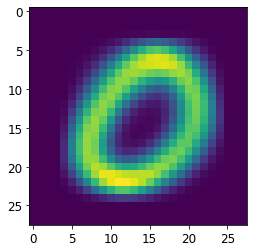

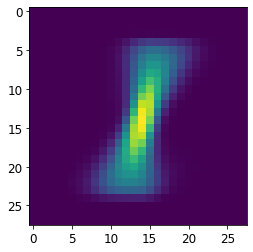

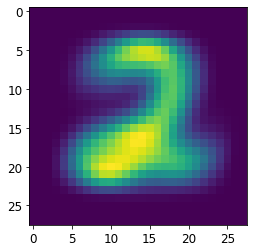

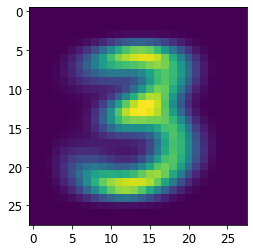

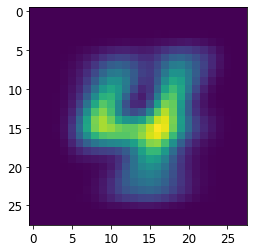

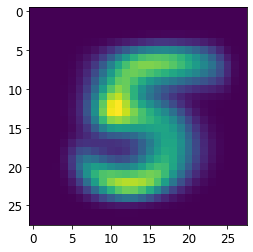

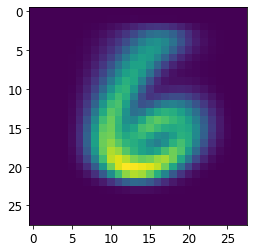

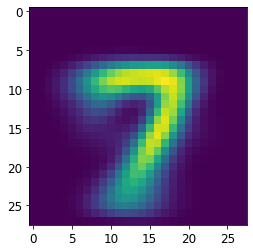

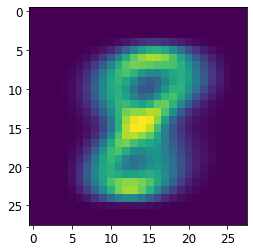

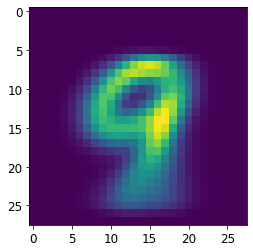

In [41]:
for i in range(10):
  mask = np.reshape(np.where(train_labels == i, 1, 0), [-1, 1, 1])
  sum = np.sum(mask)
  sub = mask * train_images
  arr = np.sum(sub, axis=0) / sum
  plt.imshow(arr)
  plt.show()